# Практическая работа №2: Корреляционный и регрессионный анализ

Выполнил студент гр. 0373 Власюк Мирослав Вариант №3

## Цель работы
Освоение основных понятий, связанных с корреляционной зависимостью между случайными величинами, статистическими гипотезами и проверкой их «справедливости». Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК оценок, с понятием функции регрессии и роли МНК в регрессионном анализе, с корреляционным отношением, как мерой тесноты произвольной (в том числе и линейной) корреляционной связи.

## Основные теоретические положения

Функциональная зависимость - каждому значению одной переменной соответствует единственное значение вполне определенное значение  другой 

Статистическая зависимость - зависимость, при котором измененение одной из величин влечет измененеи другой

Корреляционная зависимость - статистическая зависимость, при которой изменение одной величины, приводит к изменению среднего значения другой

Условное(групповое) среднее - это среднее арифметическое  тех значений случайной величины X(Y), которые соответствуют значению cлучайной величины  
$\overline{x_{y}}=\frac{\sum_{i=1}^{k_{x}}x_{i}n_{x_{i}y}}{\sum_{i=1}^{k_{x}}n_{x_{i}y}}$


$\overline{y_{x}}=\frac{\sum_{j=1}^{k_{y}}y_{j}n_{xy_{j}}}{\sum_{j=1}^{k_{y}}n_{xy_{j}}}$

Межгрупповое среднее:

$\overline{xy}=\frac{1}{n}\sum_{i=1}^{k_{x}}\sum_{j=1}^{k_{y}}n_{x_{i}y_{j}}x_{i}y_{j}$


Уравнения  регресии:

$\overline{y_{x}}-\overline{y}=r_{yx}\frac{\sigma_{y}}{\sigma_{x}}(x-\overline{x})$

$\overline{x_{y}}-\overline{x}=r_{xy}\frac{\sigma_{x}}{\sigma_{y}}(y-\overline{y})$

Статистическая оценка коэффициента корреляции: 
$r_{B}=\frac{\overline{xy}-\overline{x}\overline{y}}{s_{x}s_{y}}$


Проверка гипотезы:

$H_{0}: r_{в} = 0$

$H_{1}: r_{в} \neq 0$

$T_{набл} = r_{в}\frac{\sqrt{n-2}}{\sqrt{1-r_{в}^{2}}}, T_{крит} = t(\alpha, df), df = n-2$

Область принятия гипотезы: $|T_{набл}| < T_{крит}$


Выборочное коррреляционное отношение:
$\eta_{y_{x}} = \frac{\sigma_{межгр}}{\sigma_{общ}} = \frac{\sigma_{\overline{y_{x}}}}{\sigma_{y}}$
$\sigma_{\overline{y_{x}}} = \sqrt{\sigma_{межгр}^{2}} = \sqrt{\frac{\Sigma n_{x}(\overline{y_{x}} - \overline{y})^{2}}{n}}$

Свойства корреляционного отношения :
1. $\eta\in[0,1] $
2. Если $\eta=0$, признак Y с признаком X  не связаны корреляционной зависимостью
3. Если $\eta=1$, признак Y связан с признаком X связаны функциональной зависимостью
4. $\eta\geq|r_{B}| $
5. Если $\eta=r_{B}$, можно предположить, что это линейная корреляционная зависимость

Смысл метода наименьших квадратов в минимизации СКО  функций от искомых переменных

Минимизирующая функция: $F(a_{1}\cdots{a_{n}})=\sum_{i=1}^{n}(y_{i}-f(x_{i};a_{1}\cdots{a_{n}})^{2}\rightarrow{min}$

необходимо, чтобы все частные производные равнялись нулю

Теоретический коэффициент детерминации меру качества регрессиооной модели, опиисывает связь между переменными: $ R_{x}^{2}=\frac{\delta_{x}^{*^{2}}}{\sigma_{x}^{2}} $

Средняя квадратичная ошибка:

$A_{y}=\frac{1}{n}\sum_{i=1}^{n}|\frac{\varepsilon_{y_{i}}}{y_{i}}|$ 

$A_{x}=\frac{1}{n}\sum_{i=1}^{n}|\frac{\varepsilon_{x_{i}}}{x_{i}}|$

Средняя ошибка аппроксинации показывает отклонение рассчетных значений от фактических, допустимый предел значений ошибки аппроксимации не более 7% : $A_{x}=\frac{1}{n}\sum_{i=1}^{n}|\frac{\varepsilon_{x_{i}}}{x_{i}}|$





## Постановка задачи
Из заданной генеральной совокупности сформировать выборку по второму признаку. Для системы двух случайных величин 𝑋 (первый признак) и 𝑌 (второй признак) сформировать двумерную выборку и найти статистическую оценку коэффициента корреляции, построить доверительный интервал для коэффициента корреляции и осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю. Построить уравнения выборочных прямых среднеквадратической регрессии. Полученные линейные функции регрессии отобразить графически. Найти выборочное корреляционное отношение. Оценить адекватность моделей. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [21]:
import csv
import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import scipy.stats
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [22]:
def between(lst, a, b):
    count = 0
    for i in lst: 
        if a <= i <= b:
            count += 1
    return count 

def sum_values(arr):
    count = 0
    for i in arr:
            count += i
    return count

        

def func_laplass(num):
    return (scipy.stats.norm.cdf(num) - 1/2)
   # return  (1)/(np.sqrt(2 * np.pi)) * integrate.quad (np.exp(-(pow(num, 2))/(2)), 0
    
def processing_selection(number):
    with open("./vMiro.csv", encoding='utf-8') as r_file:
         file_reader = csv.reader(r_file, delimiter = ",")
    df = pd.read_csv("./vMiro.csv", header=None)
    
    if number == 1:
        df.pop(0)
        totalElem=len(df[1])
    if number == 0:
        df.pop(1)
        totalElem=len(df[0])
        
    #Из генеральной совокупности была сформирована репрезентативная выборка, механичиским способом.
    if number == 0:
        df = df.sort_values(0) #ранжированный
    if number == 1:
        df = df.sort_values(1) #ранжированный
        
    array_ran = df.transpose().to_numpy() #ранжированный
    dup = df.groupby(df.columns.tolist(),as_index=False).size() #вариационный
    array_varr = dup.transpose().to_numpy()
    razmax = array_varr[0][len(array_varr[0]) - 1] - array_varr[0][0] #1. найти размах вариации
    k = 1 + round(np.log2(len(df)))
    h = razmax/k # найти шаг интервального ряда h
    #k = 1 + math.floor(3.322*math.log10(len(array_ran[0]))) # найти оптимальное количество интервалов
    #h = razmax/k # найти шаг интервального ряда h
    a_0 = array_ran[0][0]
    i = 0
    quantity_interval = int((array_varr[0][len(array_varr[0]) - 1] - array_varr[0][0]) / h) #количество интервалов
    interval_arr = np.empty((quantity_interval,3))
    for i in range(quantity_interval):
        for j in range(2):
            interval_arr[i][j] = a_0 + j * h
        #print(f'i = {i} | arr[i][0] = {arr[i][0]} | arr[i][1] = {arr[i][1]} | a_0 = {a_0}')
        a_0 = interval_arr[i][1]
        interval_arr[i][2] = between(array_ran[0], interval_arr[i][0], (interval_arr[i][1] + 0.1))
        #if ()
       # if (interval_arr[i][1]) == array_ran[0][len(array_ran[0]) - 1]:
           # interval_arr[i][1] = array_ran[0][len(array_ran[0]) - 1]
           # break;
    result_inter_df = round(pd.DataFrame(interval_arr, columns=['xᵢ₋₁', 'xᵢ','nᵢ']),2)
    result_inter_df.index += 1

    result_five_df = copy.copy(result_inter_df) # копирования интервального ряда
    result_five_df = copy.copy(result_inter_df) # копирования интервального ряда
    result_five_df.insert(3,'p⃰ᵢ', (result_five_df['nᵢ'] / totalElem))   #относительная частота 

    mid_interval = np.empty(quantity_interval)  #среднее значение интервалов
    accum_abs_freq = np.empty(quantity_interval) #накопительные абсолютные часоты
    accum_abs_pro = np.empty(quantity_interval) #накопительные относительная частоты
    frequen = 0   #накопительная "переменная" для абсолютных частот
    accum_abs_pro = np.empty(quantity_interval) #накопительные относительная частоты
    freq_probality = 0  #накопительная "переменная"

    for i in range(quantity_interval):
        frequen += result_five_df['nᵢ'][i + 1]   #сумма предыдущих
        accum_abs_freq[i] = frequen  # присваивания
        freq_probality += result_five_df['p⃰ᵢ'][i + 1]
        accum_abs_pro[i] = freq_probality
        mid_interval[i] = interval_arr[i][0] + (interval_arr[i][1] - interval_arr[i][0]) / 2  #не знаю зачем ты так сделал, но сумма первого + разность второго и первого деленая на 2
    
    
    result_five_df.insert(2,'x~ᵢ',mid_interval) # добавление в дф
    result_five_df.insert(5,'∑nᵢ',accum_abs_freq)
    result_five_df.insert(6,'∑p⃰ᵢ', accum_abs_pro)
    sum_df = pd.DataFrame({'xᵢ₋₁' : [' '],
                           'xᵢ'   : [' '],
                           'x~ᵢ'  : [' '],
                           'nᵢ'   : [sum_values(result_five_df['nᵢ'])],
                           'p⃰ᵢ'  : [sum_values(result_five_df['p⃰ᵢ'])],
                           '∑nᵢ'  : ['-  '],
                           '∑p⃰ᵢ' : ['-  ']})
    sum_df.index=['∑']
    result_five_df = round(pd.concat([result_five_df, sum_df], axis=0, ignore_index=False), 2) # объединение дфов

    result_six_df  = copy.deepcopy(result_inter_df)
    conditional_option = np.empty(quantity_interval)
    fake_null = 0
    fake_null_id = 0
    if (quantity_interval % 2) == 0 :#поиск ложного нуля, если нечетные, берем серединные интервал, если четные берем интервалы по середине
        if (result_six_df['nᵢ'][quantity_interval/2] == result_six_df['nᵢ'][quantity_interval/2 + 1]): # если интервалы равны, берем тот, который раньше
            fake_null = mid_interval[int(quantity_interval/2)]
            fake_null_id = int(quantity_interval/2)
        else:
            if (result_six_df['nᵢ'][quantity_interval/2] > result_six_df['nᵢ'][quantity_interval/2 + 1]): # если не равны, берем наименьший(по среднему значнеие в интервале) из них
                fake_null = mid_interval[int(quantity_interval/2 - 1)]
                fake_null_id = int(quantity_interval/2 - 1)
            else:
                fake_null = mid_interval[int(quantity_interval/2 )]
                fake_null_id = int(quantity_interval/2)
    else:
        fake_null = mid_interval[int(quantity_interval/2)] # mid_interval индексируется с нуля
        fake_null_id = int(quantity_interval/2)
        
    for i in range(quantity_interval):
        conditional_option[i] = (mid_interval[i] - fake_null) / h   #поиск условных вариант 
        #print(f' i: {i}, midI = {mid_interval[i]}, fake_null = {fake_null}, h = {h}')
    multiplex = np.empty((5, quantity_interval))
    for i in range(4): #поиск произведения условных вариант и частот 1 2 3 4 порядка
        for j in range(quantity_interval):
            multiplex[i][j] = result_five_df['nᵢ'][j + 1] * np.power(conditional_option[j], i+ 1)


    conditional_emp_moment = copy.copy(multiplex)
    sum_cond_emp = np.empty((1, 4))
    for i in range(4): # тут тоже все по формулкам (взял и пред.пункта по формулкам)
        sum_cond_emp[0][i] = sum_values(conditional_emp_moment[i])
    sum_cond_emp /= totalElem # для центральных эмпирических все по формулкам


    centered_emp_moment = np.empty((1, 4))
    sum_cond_emp = np.empty((1, 4))
    for i in range(4): # тут тоже все по формулкам (взял и пред.пункта по формулкам)
        sum_cond_emp[0][i] = sum_values(conditional_emp_moment[i])
    sum_cond_emp /= totalElem # для центральных эмпирических все по формулкам
    centered_emp_moment[0][0] = 0 
    centered_emp_moment[0][1] = (sum_cond_emp[0][1] - pow(sum_cond_emp[0][0], 2)) * pow(h,2)
    centered_emp_moment[0][2] = (sum_cond_emp[0][2] - 3 * sum_cond_emp[0][0] * sum_cond_emp[0][1] + 2 * pow(sum_cond_emp[0][1], 3)) * pow(h, 3)
    centered_emp_moment[0][3] = (sum_cond_emp[0][3] - 4 * sum_cond_emp[0][2] * sum_cond_emp[0][0] + 6 * sum_cond_emp[0][1] * pow(sum_cond_emp[0][0], 2) - 3 * pow(sum_cond_emp[0][0], 4)) * pow(h, 4)

    x_vibor_std = 0
    for i in range(quantity_interval):  # сумма средних умноженная на частоту 
        x_vibor_std += mid_interval[i] * result_five_df['nᵢ'][i + 1]
    x_vibor_std /= totalElem # делить на количество элементы 

    dispercia_std = 0
    for i in range(quantity_interval):
        dispercia_std += ( pow(mid_interval[i] - x_vibor_std, 2) ) * result_five_df['nᵢ'][i + 1] # (средние минус х_выборочное) в квадрате умножить на частоту
    dispercia_std /= totalElem # поделить на количество элементы

    x_vibor = sum_cond_emp[0][0] * h + fake_null  
    dispercia = (sum_cond_emp[0][1] - pow(sum_cond_emp[0][0], 2)) * pow(h, 2)


    sko = np.sqrt(dispercia)
    disp_isp = dispercia * totalElem / (totalElem - 1)
    sko_isp = np.sqrt(disp_isp)

    assimetr = centered_emp_moment[0][2] / pow(sko, 3)
    ecsecc = centered_emp_moment[0][3] / pow(sko, 4) - 3

    moda = 0
    max_n = -1
    max_id = 1
    for i in range(quantity_interval):  # подсчет модального интервала
        if result_five_df['nᵢ'][i+1] > max_n:
            max_n = result_five_df['nᵢ'][i+1]
            max_id = i + 1
    if (max_id == 1) or (max_id == quantity_interval): # если модальный интервал первый или последний
        if(max_id == 1): # если первый то предыдущий мод.инт = 0
            pred_moda = 0
            next_moda = result_five_df['nᵢ'][max_id + 1]
        else:
            next_moda = 0 # если последний то следующий 0
            pred_moda = result_five_df['nᵢ'][max_id - 1]
    else: #если не первый и не последний 
        next_moda = result_five_df['nᵢ'][max_id + 1]
        pred_moda = result_five_df['nᵢ'][max_id - 1]
    #формула для моды
    moda = result_five_df['xᵢ₋₁'][max_id] + h * (result_five_df['nᵢ'][max_id] - pred_moda)/((result_five_df['nᵢ'][max_id] - pred_moda) + (result_five_df['nᵢ'][max_id] - next_moda))   

    median = 0

    id_median = 0
    accum_abs_freq_pred = 0
    for i in range(len(accum_abs_freq)):
        if accum_abs_freq[i] > int(totalElem / 2): # поиск медианы
            id_median = i
            break;
    if (id_median > 0):
        accum_abs_freq_pred = result_five_df['∑nᵢ'][id_median]
    median = result_five_df['xᵢ₋₁'][id_median + 1] + h * (0.5*totalElem - accum_abs_freq_pred)/(result_five_df['∑nᵢ'][id_median + 1])
    # формулка для медианы
    koeff_var = (sko / x_vibor) * 100
    #формулка
    
    return result_five_df, x_vibor_std, dispercia, sko, disp_isp, sko_isp, assimetr, ecsecc, moda, median, koeff_var, fake_null_id 

### Пункт 1 обработка второй выборки в объема практической работы №1

In [23]:
result, x_vibor, dispercia, sko, disp_isp, sko_isp, assimetr, ecsecc, moda, median, koeff_var, fake_null_id_x = processing_selection(0)
quantity_interval = len(result) - 1
data = [{'x_в': x_vibor, 'σ²_y': dispercia,'σ': sko,'s²_y': disp_isp,'s_y': sko_isp,'a*_s': assimetr,'ε': ecsecc,'Мₒ*': moda,'M*ₑ': median,'V*': koeff_var}]
df = pd.DataFrame(data)
df.index = ['value']
result_2, x_vibor_2, dispercia_2, sko_2, disp_isp_2, sko_isp_2, assimetr_2, ecsecc_2, moda_2, median_2, koeff_var_2, fake_null_id_y = processing_selection(1)
data = [{'y_в': x_vibor_2, 'σ²_y': dispercia_2,'σ': sko_2,'s²_y': disp_isp_2,'s_y': sko_isp_2,'a*_s': assimetr_2,'ε': ecsecc_2,'Мₒ*': moda_2,'M*ₑ': median_2,'V*': koeff_var_2}]
result_2.columns=['yᵢ₋₁', 'yᵢ', 'y~ᵢ', 'nᵢ', 'p⃰ᵢ', '∑nᵢ', '∑p⃰ᵢ']
df2 = pd.DataFrame(data)
df2.index = ['value']


In [24]:
result_2

,yᵢ₋₁,yᵢ,y~ᵢ,nᵢ,p⃰ᵢ,∑nᵢ,∑p⃰ᵢ
1,231.0,472.0,351.5,12.0,0.13,12.0,0.131868
2,472.0,713.0,592.5,25.0,0.27,37.0,0.406593
3,713.0,954.0,833.5,19.0,0.21,56.0,0.615385
4,954.0,1195.0,1074.5,11.0,0.12,67.0,0.736264
5,1195.0,1436.0,1315.5,18.0,0.20,85.0,0.934066
6,1436.0,1677.0,1556.5,2.0,0.02,87.0,0.956044
7,1677.0,1918.0,1797.5,0.0,0.00,87.0,0.956044
8,1918.0,2159.0,2038.5,4.0,0.04,91.0,1.0
∑,,,,91.0,1.00,-,-


In [25]:
df2

,y_в,σ²_y,σ,s²_y,s_y,a*_s,ε,Мₒ*,M*ₑ,V*
value,897.06044,170841.32327,413.329558,172739.560195,415.61949,86.656525,0.392109,636.894737,749.580357,46.075999


#### Вывод
Можем заметить небольшие различия в ско и ско исправленное (аналогинчо для дисперсии)

так как симметрия положительная, значит у нас отклонения распределения в сторону положительных значений, большенство значений данных меньше средних
Так как эксцесс больше нуля, значит у нас есть небольшое  количество выбросов чем в нормальном распределении 



In [26]:
df = pd.read_csv("./vMiro.csv", header=None)
array_x = df[0].to_numpy()
array_y = df[1].to_numpy()


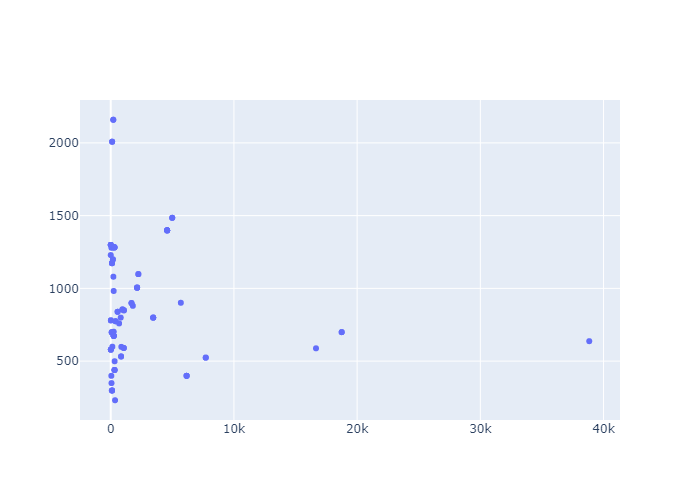

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=array_x, y=array_y, mode='markers'))
#fig.add_trace(go.Scatter(x=array_x, y=lin_alg_point))
fig.show("png")

### Пункт 2 построитель двумерный интервальный вариационный ряд

In [28]:
data_x = [f"({result['xᵢ₋₁'][1]},{result['xᵢ'][1]}]"]
data_y = [f"({result_2['yᵢ₋₁'][1]},{result_2['yᵢ'][1]}]"]
fake_null_x = copy.deepcopy(fake_null_id_x)
fake_null_y = copy.deepcopy(fake_null_id_y)
value_data = np.zeros((quantity_interval, quantity_interval))     # массив частот 

counter = 0
while (counter != len(array_x)):
    print
    for i in range(1, quantity_interval + 1):
        if (counter == len(array_x)):
            break
        for j in range(1, quantity_interval + 1):
            if (counter == len(array_x)):
                break
            if (array_x[counter]  >= result['xᵢ₋₁'][i] and array_x[counter] <= result['xᵢ'][i] and array_y[counter]  >= result_2['yᵢ₋₁'][j] and array_y[counter] <= result_2['yᵢ'][j]):
                counter += 1
                value_data[i-1][j-1] += 1


value_frequency_x = []
value_frequency_y = []
allsum = 0
for i in range(0, quantity_interval):     ## подсчеты суммы элементов в каждом строке\стобце 
    sum1 = 0
    sum2 = 0
    for j in range(0, quantity_interval):
        sum1 += value_data[i][j]
        sum2 += value_data[j][i]
        allsum += value_data[i][j]
    value_frequency_x.append(sum1)
    value_frequency_y.append(sum2)

    
big_num_x = 0
big_num_y = 0
for i in range(len(value_frequency_x)):
    if big_num_x < value_frequency_x[i]:
        big_num_x = value_frequency_x[i]
#        fake_null_x = i
    if big_num_y < value_frequency_y[i]:
        big_num_y = value_frequency_y[i]
#        fake_null_y = i

value_frequency_x.append(allsum)

for i in range(1, quantity_interval):     #
    data_x.append (f"({result['xᵢ₋₁'][i+1]},{result['xᵢ'][i+1]}]")
    data_y.append (f"({result_2['yᵢ₋₁'][i+1]},{result_2['yᵢ'][i+1]}]")
    
data_x.append('n_y')
data_y.append('n_x')

value_data_n = copy.deepcopy(value_data)
value_data_n = np.vstack([value_data_n, value_frequency_y])
value_data_n = np.hstack((value_data_n, np.atleast_2d(value_frequency_x).T))

In [29]:
df_3 = pd.DataFrame(value_data_n.transpose(), columns=data_x, index=data_y)
df_3

,"(2.0,4856.62]","(4856.62,9711.25]","(9711.25,14565.88]","(14565.88,19420.5]","(19420.5,24275.12]","(24275.12,29129.75]","(29129.75,33984.38]","(33984.38,38839.0]",n_y
"(231.0,472.0]",9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
"(472.0,713.0]",19.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,25.0
"(713.0,954.0]",18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
"(954.0,1195.0]",11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
"(1195.0,1436.0]",18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
"(1436.0,1677.0]",0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"(1677.0,1918.0]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1918.0,2159.0]",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
n_x,79.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,91.0


### Пункт 3 по двумерному интервальному вариационному ряду сформировать условные варианты и посмотрить корреляционную таблицу

In [30]:
fkarr_x = [0]*quantity_interval
fkarr_y = [0]*quantity_interval

for i in range(fake_null_x, 0, -1): # поиск фейк нуля
    fkarr_x[fake_null_x - i] = -i 
for i in range(0, quantity_interval- fake_null_x):
    fkarr_x[i + fake_null_x] = i 
    
for i in range(fake_null_y, 0, -1):
    fkarr_y[fake_null_y - i] = -i     
for i in range(0, quantity_interval - fake_null_y):
    fkarr_y[i + fake_null_y] = i 
 #   print(f"i: {i}, fkarr={fkarr_y}\n")
    
U = [1]*quantity_interval ## тут подсчет Uv и их сумым
V = [1]*quantity_interval

for i in range(quantity_interval):
    sum_x = 0
    sum_y = 0
    for j in range(quantity_interval):
        sum_x += value_data[i][j] * fkarr_y[j]
        sum_y += value_data[j][i] * fkarr_x[j]
       # print(f"sum_y: {sum_y} valuedata: {value_data[j][i]} fkarry: {fkarr_y[j]}")
    V[i] = sum_y
    U[i] = sum_x
    V = np.array(V)
    U = np.array(U)
    
    
    
    
value_data_u = copy.deepcopy(value_data)

value_data_u = np.vstack([value_data_u, V])
value_data_u = np.hstack((value_data_u, np.atleast_2d(np.append(U, '-')).T))
Uv = np.append(U*fkarr_x, [np.sum(U*fkarr_x), 'Контроль'])
value_data_u = np.vstack([value_data_u, np.append(V*fkarr_y, np.sum(V*fkarr_y))])
value_data_u = np.hstack((value_data_u, np.atleast_2d( Uv ).T))

columns_df3 = copy.deepcopy(fkarr_x)
index_df3 = copy.deepcopy(fkarr_y)
columns_df3.append('sum_U')
columns_df3.append('uV')
index_df3.append('sum_V')
index_df3.append('vU')
df3_result = pd.DataFrame(value_data_u.transpose(), columns=columns_df3, index=index_df3 )
df3_result

,-3,-2,-1,0,1,2,3,4,sum_U,uV
-4,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,132.0
-3,19.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,-57.0,171.0
-2,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-56.0,112.0
-1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.0,33.0
0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-54.0,-0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,-4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.0,-36.0
sum_V,-128.0,-18.0,0.0,-9.0,0.0,0.0,0.0,-3.0,-,408.0
vU,384.0,36.0,-0.0,-0.0,0.0,0.0,0.0,-12.0,408.0,Контроль


#### Вывод 
Суммы получились равными, значит контроль  пройден

### Пункт 4 Вычислить коэффициент корреляции 

In [31]:
U_2 = [0]*quantity_interval ## тут подсчет Uv и их сумым
V_2 = [0]*quantity_interval
sum_x = 0
for i in range(quantity_interval):
    for j in range(quantity_interval):
        sum_x += value_data[i][j] * fkarr_x[i] * fkarr_y[j]
       # print(f"sum_y: {sum_y} valuedata: {value_data[j][i]} fkarry: {fkarr_y[j]}")
value_frequency_x.pop()
u_strih = np.sum(value_frequency_x * np.array(fkarr_x) /  len(array_x))
v_strih = np.sum(value_frequency_y * np.array(fkarr_y) /  len(array_x))
u_strih_2 = np.sum(value_frequency_x * np.array(fkarr_x)**2 / len(array_x))
v_strih_2 = np.sum(value_frequency_y * np.array(fkarr_y)**2 /  len(array_x))
sum = 0
#for i in range(quantity_interval):
  #  for j in range(quantity_interval):
        
sko_cond_U = np.sqrt(u_strih_2 - u_strih**2)
sko_cond_V = np.sqrt(v_strih_2 - v_strih**2)

r = (sum_x - len(array_x) * u_strih * v_strih ) /  ( len(array_x) * sko_cond_U * sko_cond_V )
print(r)

-0.16873630437628429


#### Вывод
Коэфициент корреляции,равный -0.16, отрицательный, значит  при возрастании одной велиичны другая убывает, корреляционная свзяь очень слабая.

### Пункт 5 Доверительный интервал для коэффициента корреляции  при уровне значимости 0.95 и 0.99

In [32]:
t = [1.96, 2.62] # ф-я лаплласа для гамма 0.95 и 0.99
dov_int = np.empty((2,2))
dov_int[0][0] = np.tanh(np.arctanh(r)) - t[0] / np.sqrt(len(array_x ) - 3)
dov_int[0][1] = np.tanh(np.arctanh(r)) + t[0] / np.sqrt(len(array_x ) - 3)
dov_int[1][0] = np.tanh(np.arctanh(r)) - t[1] / np.sqrt(len(array_x ) - 3)
dov_int[1][1] = np.tanh(np.arctanh(r)) + t[1] / np.sqrt(len(array_x ) - 3)
print(f"{dov_int[0][0]} ; {dov_int[0][1]} \n{dov_int[1][0]} ;{dov_int[1][1]}")

-0.3776730064047825 ; 0.04020039765221392 
-0.44802924280213396 ;0.1105566340495654


#### Вывод
Доверительный интервал с надёжностью 0.95: (-0.377;0.040) 

Доверительный интервал с надёжностью 0.99: (-0.448;0.110) 

В рассчитанные интервальные ряды попадает полученное ранее значения коэффициента корреляции r = -0.16


### Пункт 6 Осуществить проверку статистической гипотезы о равенстве коэффициента корреляции нулю при заданном уровне значимости 0.05

In [33]:
T_nabl = r * np.sqrt(len(array_x)) / np.sqrt(1 - r**2)
T_krit = 1.98
print (T_nabl, T_krit)

-1.6330577952024636 1.98


#### Вывод 
Так как   $T_{набл}$ = -1.633 меньше  $T_{крит} = 1.98$, значит принимаем гипотезу  $H_0:r = 0$, то есть линейной корреляцонной связи между Х и Y нет; коэффициент корреляции не значим

### Пункт 7 Для заданной выборки построить уравнения средней квадратичной регрессии x на y и y на x соотвестевнно. отобразить прямые на множестве выборки

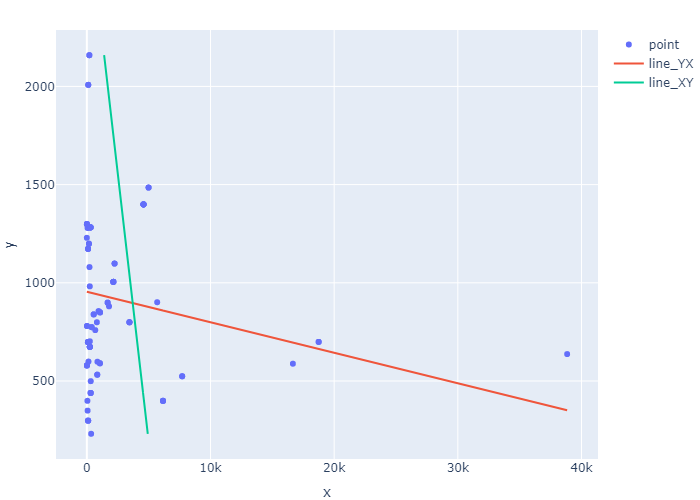

In [34]:
lin_alg_point_YX = x_vibor_2 + (r * sko_2 )/ sko  *(np.array(array_x) - x_vibor)
lin_alg_point_XY = x_vibor + (r * sko )/ sko_2  *(np.array(array_y) - x_vibor_2)

fig = go.Figure()
fig.add_trace(go.Scatter(x=array_x, y=array_y, mode='markers', name='point'))
fig.add_trace(go.Scatter(x=array_x, y=lin_alg_point_YX, name='line_YX'))
fig.add_trace(go.Scatter(x=lin_alg_point_XY, y=array_y, name='line_XY'))
fig.update_layout(title="",
                  xaxis_title = 'x',
                  yaxis_title = 'y',
                          margin=dict(l=0, r=0,b=0, t=30))
fig.show("png")

####  Вывод
Из графиков видно, что корреляция действительно отрицательна

### Пункт 8 Вычислить корреляционные отношения $\eta_{yx} и \eta_{xy}$ убедиться, что рнеравенства выполняются и сделать выводы

In [35]:
mid_interval_x = copy.deepcopy(result['x~ᵢ'])
mid_interval_y = copy.deepcopy(result_2['y~ᵢ'])
conditional_mid_x = [0]*quantity_interval
conditional_mid_y = [0]*quantity_interval
for i in range(quantity_interval):
    sum_x = 0
    sum_y = 0
    for j in range(quantity_interval):
        sum_x += value_data[j][i] * mid_interval_x[j + 1]
        sum_y += value_data[i][j] * mid_interval_y[j + 1]
        
    if value_frequency_y[i] == 0:
        conditional_mid_x[i] = 0
    else:
        conditional_mid_x[i] = sum_x / value_frequency_y[i]
        
    if value_frequency_x[i] == 0:
        conditional_mid_y[i] = 0
    else: 
        conditional_mid_y[i] = sum_y / value_frequency_x[i]
        
sum_cond_mid_x = 0
sum_cond_mid_y = 0

for i in range(quantity_interval):
    sum_cond_mid_x += mid_interval_x[i + 1] * value_frequency_x[i]
    sum_cond_mid_y += mid_interval_y[i + 1] * value_frequency_y[i]
sum_cond_mid_x /= len(array_x)
sum_cond_mid_y /= len(array_x)

sum = 0
for i in range(quantity_interval):
    sum += value_frequency_x[i] * (conditional_mid_y[i] - sum_cond_mid_x)**2
sko_mg = np.sqrt(sum / len(array_x))

sum = 0
for i in range(quantity_interval):
    sum += value_frequency_y[i] * (mid_interval_y[i+1] - sum_cond_mid_x)**2
sko_ob = np.sqrt(sum / len(array_y))
eta_yx = sko_mg / sko_ob

sum = 0
for i in range(quantity_interval):
    sum += value_frequency_y[i] * (conditional_mid_x[i] - sum_cond_mid_y)**2
sko_mg = np.sqrt(sum / len(array_x))

sum = 0
for i in range(quantity_interval):
    sum += value_frequency_x[i] * (mid_interval_x[i+1] - sum_cond_mid_y)**2
sko_ob = np.sqrt(sum / len(array_y))

eta_xy = sko_mg / sko_ob

print(eta_yx, eta_xy)




0.9897552631032738 0.6078085306054839


$\eta_{yx} = 0.98, \eta_{xy} = 0.60$, они  больше $|r_{xy}|$, проверка пройдена
#### Вывод
Отношение между yx стремится к единице, значит у него большая степень влияния 

### Пункт 9 Для заданной выборки построить корреляционную кривую параболического вида, отобразить парабалическую прямую на множестве выборки 

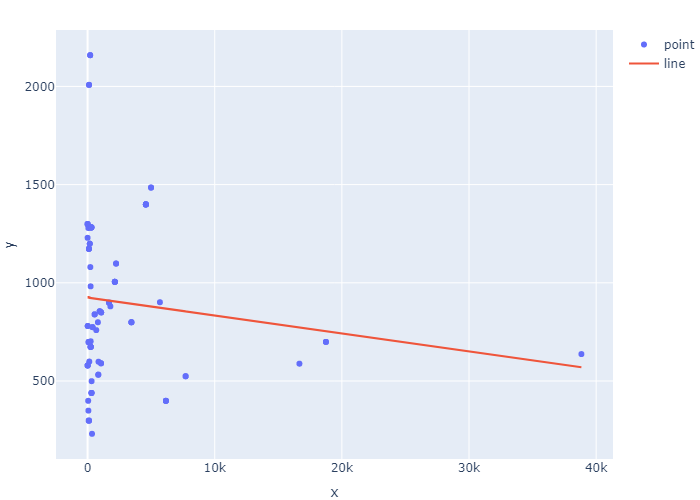

In [36]:
arr_mid_x = np.delete(np.array(mid_interval_x.to_numpy()), -1) 
arr_mid_y = np.delete(np.array(mid_interval_y.to_numpy()), -1)
matrix = np.empty((3, 3))
matrix_result = np.empty((3, 1))

matrix[0][0] = len(array_x)
matrix[0][1] = np.sum(array_x)
matrix[0][2] = np.sum(array_x**2)

matrix[1][0] = np.sum(array_x)
matrix[1][1] = np.sum(array_x**2)
matrix[1][2] = np.sum(array_x**3)

matrix[2][0] = np.sum(array_x**2)
matrix[2][1] = np.sum(array_x**3)
matrix[2][2] = np.sum(array_x**4)

#matrix[0][0] = len(array_x)
#matrix[1][0] = np.sum(array_x)
#matrix[2][0] = np.sum(array_x**2)

#matrix[0][1] = np.sum(array_x)
#matrix[1][1] = np.sum(array_x**2)
#matrix[2][1] = np.sum(array_x**3)

#matrix[0][2] = np.sum(array_x**2)
#matrix[1][2] = np.sum(array_x**3)
#matrix[2][2] = np.sum(array_x**4)```
matrix_result[0][0] = np.sum(array_y)
matrix_result[1][0] = np.sum(array_y * array_x)
matrix_result[2][0] = np.sum(array_y * array_x**2)

res = np.linalg.inv(matrix).dot(matrix_result)
y_print = res[0][0] + res[1][0] * array_x + res[2][0] * array_x ** 2

fig = go.Figure()
fig.add_trace(go.Scatter(x=array_x, y=array_y, mode='markers', name='point'))
fig.add_trace(go.Scatter(x=array_x, y=y_print, name='line'))
fig.update_layout(title="",
                  xaxis_title = 'x',
                  yaxis_title = 'y',
                          margin=dict(l=0, r=0,b=0, t=30))
fig.show("png")

#### Вывод
Можно увидеть "параболлу", которая должна отражать минимазацию суммы квадратов отклоений

### Пункт 10 Для заданной выборки построить нелинейные корреляционные кривые c помощью МНК в зависимости от номера варианта:

In [37]:
b1 = (np.sum(array_y) * np.sum(array_x**2) -  np.sum(array_x) * np.sum((array_x*array_y))) / (len(array_x)*np.sum(array_x**2)- np.sum(array_x)**2)
b2 = (len(array_x) * np.sum (array_x * array_y) - np.sum(array_x) * np.sum(array_y))/(len(array_x)*np.sum(array_x**2)- np.sum(array_x)**2)
y_1 = 1 / (b1 + b2 * array_x)**-1
b1, b2

(924.8152131678504, -0.009078444718442217)

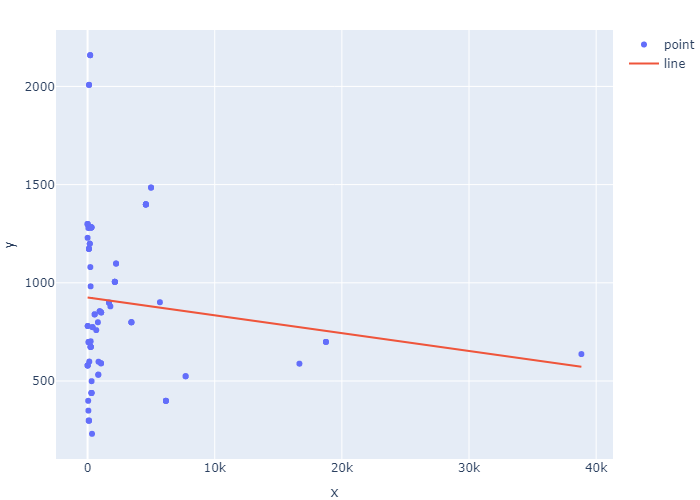

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=array_x, y=array_y, mode='markers', name='point'))
fig.add_trace(go.Scatter(x=array_x, y=y_1, name='line'))
fig.update_layout(title="",
                  xaxis_title = 'x',
                  yaxis_title = 'y',
                          margin=dict(l=0, r=0,b=0, t=30))
fig.show("png")

#### Вывод
  $y = \frac{1}{924.81 + -0.009x}$ график демонистрирует среднее распространение точек

###  Пункт 11 Вычислить следующие показатели качества регрессии для каждого из четырёх уравнений и сделать выводы:


In [39]:
#mid_xy = 0
#mid_x = 0
#mid_y = 0

#mid_xy = np.sum(array_x * array_y / len(array_x))
#mid_x = np.sum(array_x**2 / len(array_x))
#mid_y = np.sum(array_y**2 / len(array_x))
#ro_x_y = (mid_xy - sum_cond_mid_x * sum_cond_mid_y) / (mid_x - sum_cond_mid_x**2)
#ro_y_x = (mid_xy - sum_cond_mid_x * sum_cond_mid_y) / (mid_y - sum_cond_mid_y**2)
deter = [0]*4
ErSko = [0]*4
sigma = [0]*4
apr = [0]*4

deter[0] = np.sum( (x_vibor_2 + (r * sko_2 )/ sko  *(np.array(array_x) - x_vibor)  - np.mean(array_x))**2 /  len(array_x) ) 
deter[1] = np.sum( (x_vibor + (r * sko )/ sko_2  *(np.array(array_y) - x_vibor_2)  - np.mean(array_y))**2 /  len(array_x) ) 
deter[2] = np.sum ((res[0][0] + res[1][0] * array_x + res[2][0] * array_x ** 2 - np.mean(array_x))**2 / len(array_x) )
deter[3] = np.sum(((b2*array_x + b1)  - np.mean(array_x))**2 / len(array_x))

ErSko[0] = np.sum( (x_vibor_2 + (r * sko_2 )/ sko  *(np.array(array_x) - x_vibor)  - array_x) /  len(array_x)  ) 
ErSko[1] = np.sum( (x_vibor + (r * sko )/ sko_2  *(np.array(array_y) - x_vibor_2)  - array_y) /  len(array_x)  ) 
ErSko[2] = np.sum ((res[0][0] + res[1][0] * array_x + res[2][0] * array_x ** 2 - array_x) / len(array_x)  )
ErSko[3] = np.sum((  (b2*array_x + b1) ) / len(array_x))


apr[0] = np.sum( (x_vibor_2 + (r * sko_2 )/ sko  *(np.array(array_x) - x_vibor)   - array_x) /  array_x ) 
apr[1] = np.sum( (x_vibor + (r * sko )/ sko_2  *(np.array(array_y) - x_vibor_2)  - (array_y)) /  array_x ) 
apr[2] = np.sum ((res[0][0] + res[1][0] * array_x + res[2][0] * array_x ** 2  - array_x) / array_x )
apr[3] = np.sum((  (b2*array_x + b1) ) / array_x )

deter = np.array(deter) / np.var(array_x)
ErSko = np.array(np.abs(ErSko))**0.5
apr = np.array(apr) * 1000 /  np.sum(array_y)

                  
determint =  np.sum(((eta_yx * array_x + eta_xy* sum_cond_mid_x))**2 / len(array_x))


print(deter, ErSko, apr)


[0.07464521 0.30568079 0.07603081 0.07603081] [37.78640345 52.86129049 37.98105369 30.05855092] [32.45180049 77.86579097 31.40000759 32.51312759]


#### Вывод
Низкие показатели коэффициента детерминации означают, что связи между переменными регрессионой модели отсутствует 
СКО указывает зависмость друг от друга, разница  наблюдаемого от действительного
Высокие проценты аппроксимации говорят нам о том что использовать данную модель не является хорошим решением (атк как ошибка >7%)

## Выводы

Общий вывод по проделанной работе.

Была проведения обработка второй выборки в объеме первой практической работы

Построен двуметный интервальынй вариационный ряд

Сформированы условные варианты и построенна корреляционная таблица

Вычислен коэфициент корреляции, который вышел отрицательным и означает, что данные выборок слабо связанны между собой

Посроен доверительный интервал для разных уровней значимости, убедились, что он покрывает коэффициент корреляции

Проверена и в последвии подтверждена  статистическая гипотеза о равенстве коэффициента корреляции 

Посчитано и построенно уравнение средней квадратичной регресии

Выичлсенны корреляционные отношения

Построена и вычислена корреляционная кривая параболического вида
